# Data Analyses

First of all, we must analyze the movie dataset from GroupLens to understand all the details about it. The dataset is available on:
https://grouplens.org/datasets/movielens/1m/

In this sense, you must do:

- Read all files by pandas library
- Analyze the number of users, movies and data sparsity
- Analyze some users and items distribution

In [1]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# useful command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams.update({'font.size': 14})

np.set_printoptions(precision=2)

# Carrega a base de dados sonar.
from google.colab import files
uploaded = files.upload()

Saving users.dat to users.dat
Saving movies.dat to movies.dat
Saving ratings.dat to ratings.dat


## Reading files

I propose to read the files by pandas library because it is easier to see all features related to users and items.

In [5]:
df_ratings = pd.read_csv('ratings.dat', sep='::', names=['userId', 'itemId', 'rating', 'timestamp'])
df_movies = pd.read_csv('movies.dat', sep='::', names=['movieId', 'title', 'genres'], encoding = 'latin')
df_users = pd.read_csv('users.dat', sep='::', names=['userId', 'gender', 'age', 'occupation', 'zip-code'])

<ipython-input-5-11b671741f8e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_ratings = pd.read_csv('ratings.dat', sep='::', names=['userId', 'itemId', 'rating', 'timestamp'])
<ipython-input-5-11b671741f8e>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_movies = pd.read_csv('movies.dat', sep='::', names=['movieId', 'title', 'genres'], encoding = 'latin')
<ipython-input-5-11b671741f8e>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning b

In [6]:
df_ratings.head()
df_movies.head()
df_users.head()

,userId,itemId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## A brief overview

Here, you must measure the number of users, items and data sparsity of the dataset. Moreover, you should generate graphics about the users' consumption historic and the number of times each item was watched.

In [22]:
nb_users = len(df_ratings['userId'].unique())
nb_items = len(df_ratings['itemId'].unique())
nb_ratings = len(df_ratings['rating'])

In [23]:
sparsity = 1 -  (nb_ratings)/float(nb_users * nb_items)

In [24]:
print("Basic Overview:")
print("- Nb of users:", nb_users)
print("- Nb of items:", nb_items)
print("- Nb of ratings:", nb_ratings)
#
print("- Data sparsity:", sparsity)

Basic Overview:
- Nb of users: 6040
- Nb of items: 3706
- Nb of ratings: 1000209
- Data sparsity: 0.9553163743776871


### Users Consumption Historic

In [25]:
# list of items consumed by each userId
items_consumed_by_user = df_ratings.groupby('userId')['itemId'].apply(list)
items_consumed_by_user

userId
1       [1193, 661, 914, 3408, 2355, 1197, 1287, 2804,...
2       [1357, 3068, 1537, 647, 2194, 648, 2268, 2628,...
3       [3421, 1641, 648, 1394, 3534, 104, 2735, 1210,...
4       [3468, 1210, 2951, 1214, 1036, 260, 2028, 480,...
5       [2987, 2333, 1175, 39, 288, 2337, 1535, 1392, ...
                              ...                        
6036    [571, 574, 2053, 2054, 2058, 588, 589, 4, 3005...
6037    [589, 3006, 1407, 2064, 2065, 593, 3015, 903, ...
6038    [1419, 920, 3088, 232, 1136, 1148, 1183, 2146,...
6039    [588, 2067, 1416, 3022, 3028, 2080, 2083, 2087...
6040    [573, 589, 1, 2068, 592, 593, 3016, 3017, 2070...
Name: itemId, Length: 6040, dtype: object

In [26]:
# users consumption information
users_historic = {}
for userId in df_ratings['userId'].unique():
  users_historic[userId] = len(items_consumed_by_user[userId][:])

Text(0, 0.5, 'Qtd de filmes assistidos')

Text(0.5, 0, 'Usuários')

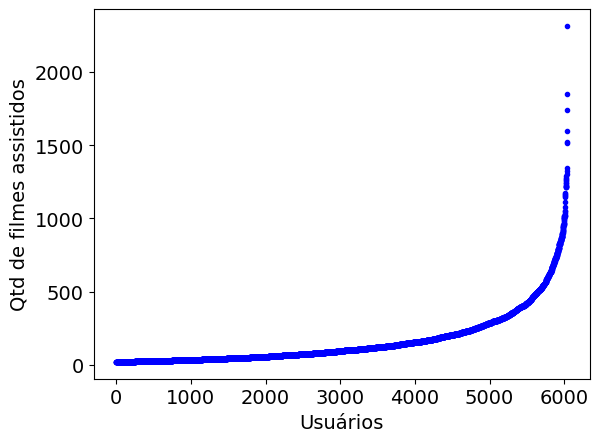

In [27]:
# Plot the distribution
distribution = list(users_historic.values())
distribution.sort()
plt.plot(distribution, '.', color = 'blue')
plt.ylabel('Qtd de filmes assistidos')
plt.xlabel('Usuários')
plt.show()

In [28]:
# Other information
print("Informações específicas:")
print("- Média: ", np.mean(list(users_historic.values())))
print("- Mediana: ", np.median(list(users_historic.values())))
print("- Min: ", np.min(list(users_historic.values())))
print("- Max: ", np.max(list(users_historic.values())))
print("- std: ", np.std(list(users_historic.values())))

Informações específicas:
- Média:  165.5975165562914
- Mediana:  96.0
- Min:  20
- Max:  2314
- std:  192.73107252940773


### Items Popularity

In [29]:
# list of users who watched each itemId
users_who_watched = df_ratings.groupby('itemId')['userId'].apply(list)
users_who_watched

itemId
1       [1, 6, 8, 9, 10, 18, 19, 21, 23, 26, 28, 34, 3...
2       [10, 13, 18, 23, 27, 40, 44, 48, 53, 60, 62, 7...
3       [26, 45, 62, 137, 153, 163, 166, 169, 199, 202...
4       [8, 26, 155, 187, 199, 203, 216, 225, 323, 329...
5       [26, 48, 155, 169, 202, 237, 261, 264, 284, 30...
                              ...                        
3948    [9, 10, 15, 19, 31, 38, 48, 52, 56, 58, 61, 65...
3949    [30, 73, 85, 110, 116, 149, 150, 151, 167, 169...
3950    [151, 173, 195, 319, 482, 623, 624, 673, 678, ...
3951    [173, 195, 411, 593, 629, 830, 838, 850, 856, ...
3952    [23, 36, 52, 72, 102, 127, 149, 151, 173, 178,...
Name: userId, Length: 3706, dtype: object

In [33]:
# users consumption information
items_popularity = {}
for itemId in df_ratings['itemId'].unique():
  items_popularity[itemId] = len(users_who_watched[itemId][:])

Text(0, 0.5, 'Popularidade')

Text(0.5, 0, 'Itens')

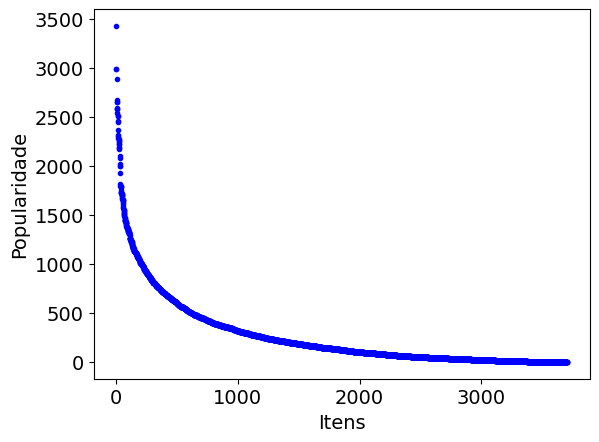

In [36]:
# Plot the distribution
distribution = list(items_popularity.values())
distribution.sort()
plt.plot(distribution[::-1], '.', color = 'blue')
plt.ylabel('Popularidade')
plt.xlabel('Itens')
plt.show()

In [37]:
# Other information
print("Informações específicas:")
print("- Média: ", np.mean(list(items_popularity.values())))
print("- Mediana: ", np.median(list(items_popularity.values())))
print("- Min: ", np.min(list(items_popularity.values())))
print("- Max: ", np.max(list(items_popularity.values())))
print("- std: ", np.std(list(items_popularity.values())))

Informações específicas:
- Média:  269.88909875876953
- Mediana:  123.5
- Min:  1
- Max:  3428
- std:  383.9960197430679
